In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df1 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/timeseriesAL/ensemble_results1.csv', header=None)
df2 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/timeseriesAL/ensemble_results2.csv', header=None)

In [47]:
df1.columns = ['class', 'precision', 'recall', 'f1-score', 'support', 'rounds']
df2.columns = ['class', 'precision', 'recall', 'f1-score', 'support', 'rounds']

In [48]:
df1['epoch'] = np.repeat(range(1, 21), 8)
df2['epoch'] = np.repeat(range(1, 21), 8)

In [60]:
df1 = df1.dropna()
df2 = df2.dropna()

df1.iloc[:, 1:] = df1.iloc[:, 1:].apply(pd.to_numeric)
df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_numeric)

df1_weighted_avg = df1[df1['class'] == 'macro avg']
df2_weighted_avg = df2[df2['class'] == 'macro avg']

# make a df with accuracy (when class == accuracy)
df1_accuracy = df1[df1['class'] == 'accuracy']
df2_accuracy = df2[df2['class'] == 'accuracy']
df1_accuracy.columns = ['class', 'accuracy', 'accuracy1', 'accuracy2', 'accuracy3', 'rounds', 'epoch']
df2_accuracy.columns = ['class', 'accuracy', 'accuracy1', 'accuracy2', 'accuracy3', 'rounds', 'epoch']



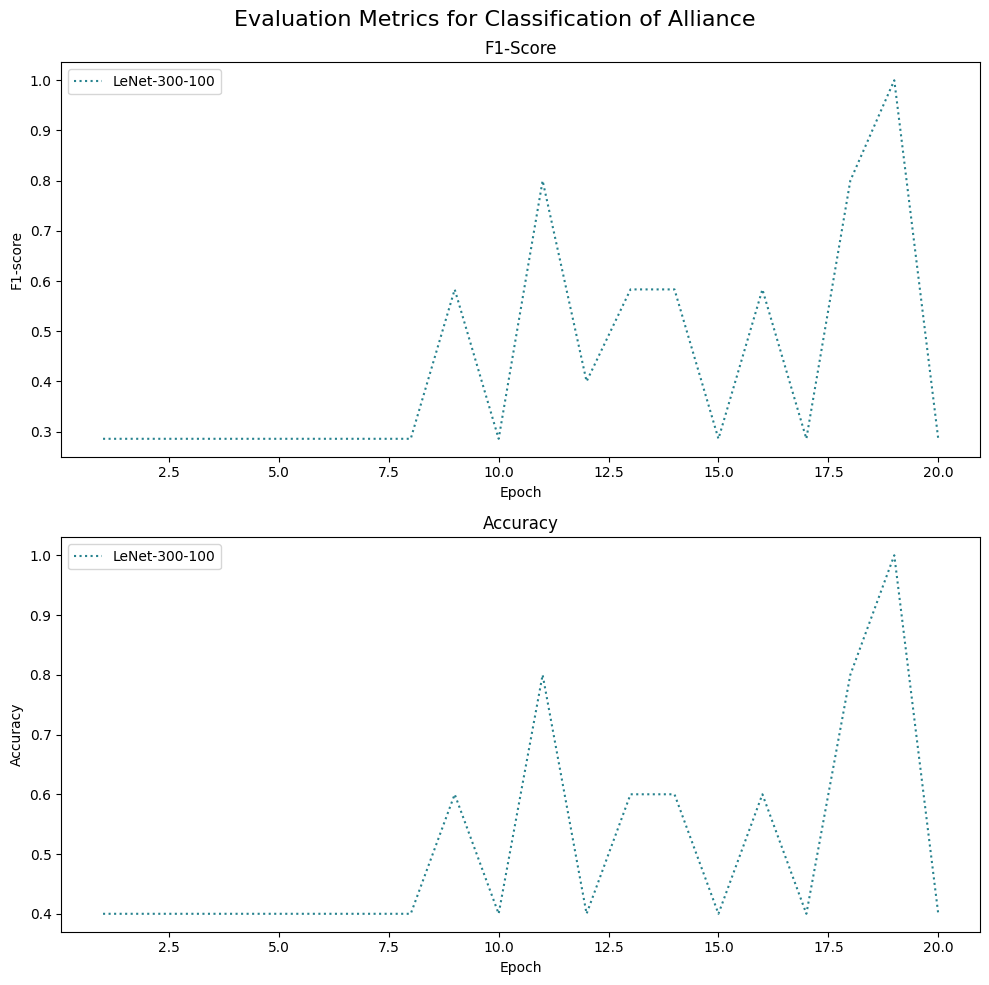

In [66]:
# set the color 
colors = sns.color_palette("viridis", 8)

# loop through the colors and assign colors_[i] to the color
for i in range(8):
    exec(f'color_{i} = colors[i]')
    

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# title
fig.suptitle('Evaluation Metrics for Classification of Alliance', fontsize=16)


# First subplot: F1 scores for all models
ax1.plot(df1_weighted_avg['epoch'], df1_weighted_avg['f1-score'], label='LeNet-300-100', color=color_3, linestyle='dotted')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-Score')
ax1.legend()

# Second subplot: Accuracy for all models
ax2.plot(df1_accuracy['epoch'], df1_accuracy['accuracy1'], label='LeNet-300-100', color=color_3, linestyle='dotted')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [123]:
# last 8 rows of the first round in df_both (when round is 1 and epoch is 20)
df1_last_round = df_both[(df_both['rounds'] == 1) & (df_both['epoch'] == 20)]
df2_last_round = df_both[(df_both['rounds'] == 2) & (df_both['epoch'] == 20)]

In [129]:
df2_last_round

,class,precision,recall,f1-score,support,rounds,epoch
153,0,0.666667,0.666667,0.666667,3.000000,2,20
154,1,0.500000,0.500000,0.500000,2.000000,2,20
155,accuracy,0.600000,0.600000,0.600000,0.600000,2,20
156,macro avg,0.583333,0.583333,0.583333,5.000000,2,20
157,weighted avg,0.600000,0.600000,0.600000,5.000000,2,20
158,ece,0.102963,0.102963,0.102963,0.102963,2,20
159,ece_calibrated,0.102963,0.102963,0.102963,0.102963,2,20


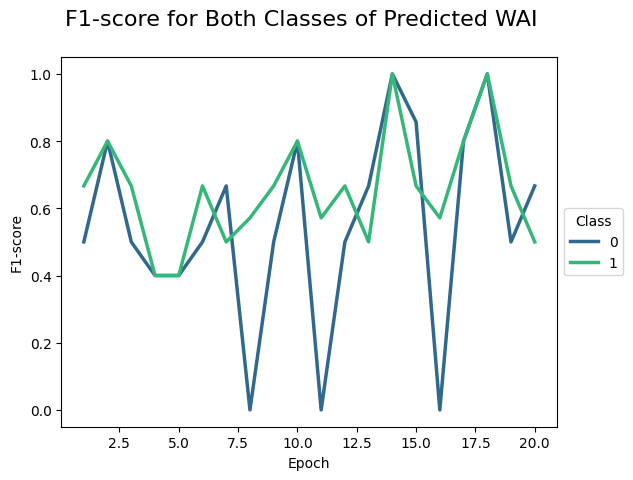

In [77]:
df1_classes = df1[df1['class'].apply(lambda x: x.isnumeric())]
df2_classes = df2[df2['class'].apply(lambda x: x.isnumeric())]

df1_classes_f1 = df1_classes.pivot(index='epoch', columns='class', values='f1-score')
df2_classes_f1 = df2_classes.pivot(index='epoch', columns='class', values='f1-score')

# plot all classes. each model gets its own panel
figsize = (10, 16)
plt.suptitle('F1-score for Both Classes of Predicted WAI', fontsize=16)

sns.lineplot(data=df2_classes_f1, dashes=False, palette='viridis', linewidth=2.5)
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epoch')
plt.ylabel('F1-score')

plt.savefig('f1-score_all_classes.png', bbox_inches='tight')

In [84]:
df_both = pd.concat([df1, df2], axis=0)


df_both_accuracy = df_both[df_both['class'] == 'accuracy']

In [87]:
df_both_accuracy.columns = ['class', 'accuracy', 'accuracy1', 'accuracy2', 'accuracy3', 'rounds', 'epoch']

In [90]:
df_both_accuracy_last_round = df_both_accuracy[df_both_accuracy['epoch'] == 20]
df_both_f1_last_round = df_both[(df_both['class'] == 'macro avg') & (df_both['epoch'] == 20)]

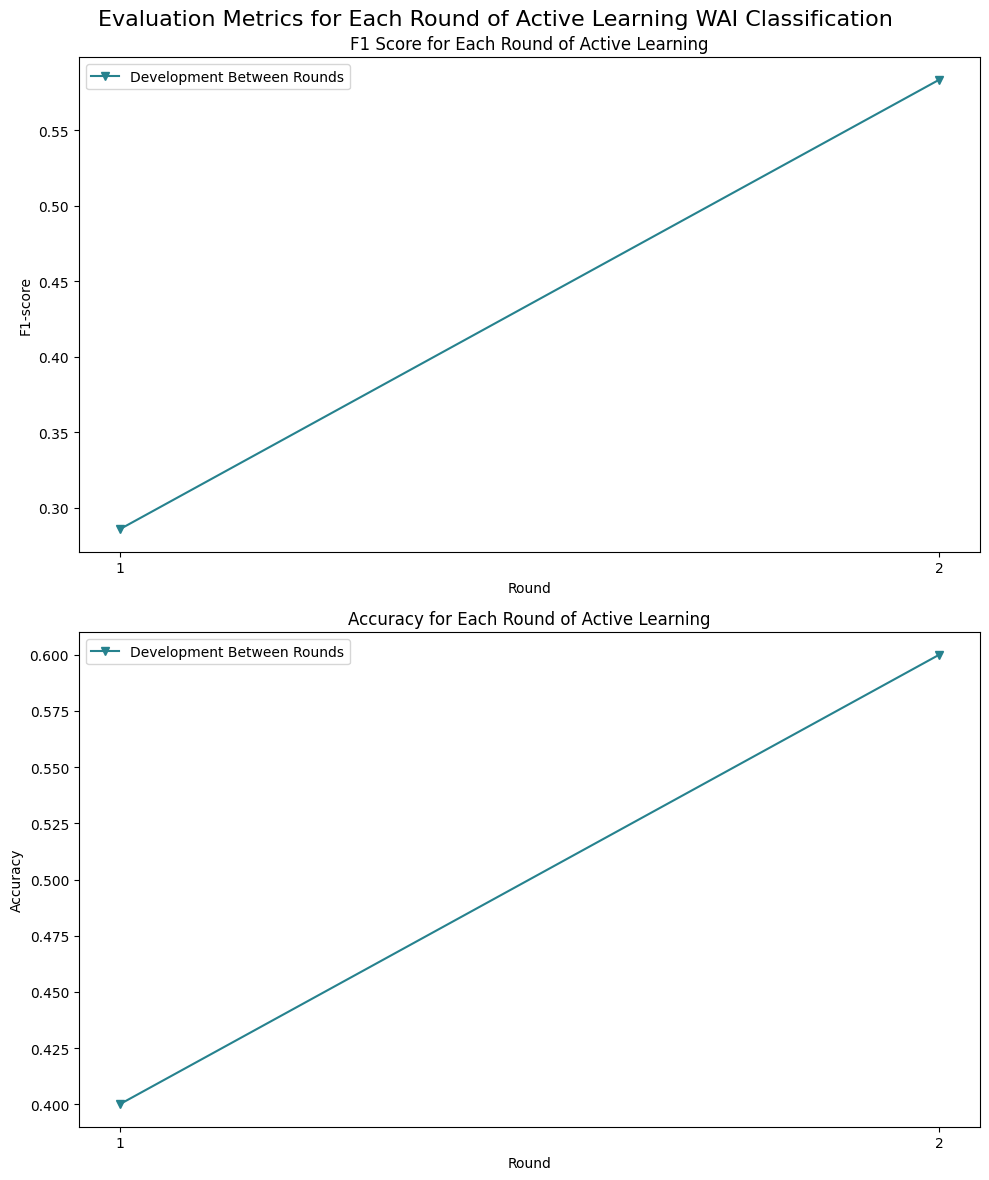

In [104]:
# Create a figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# title
fig.suptitle('Evaluation Metrics for Each Round of Active Learning WAI Classification', fontsize=16)


# First subplot: F1 scores per round for all models

ax1.plot(df_both_f1_last_round['rounds'], df_both_f1_last_round['f1-score'], label='Development Between Rounds', color=color_3, marker='v')
# show only 1 and 2 on the x-axis
ax1.set_xticks([1, 2])
ax1.set_xlabel('Round')
ax1.set_ylabel('F1-score')
ax1.set_title('F1 Score for Each Round of Active Learning')
# show only integer ticks
ax1.legend()


# Second subplot: Accuracy per round for all models

ax2.plot(df_both_accuracy_last_round['rounds'], df_both_accuracy_last_round['accuracy'], label='Development Between Rounds', color=color_3, marker='v')
ax2.set_xticks([1, 2])
ax2.set_xlabel('Round')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy for Each Round of Active Learning')
ax2.legend()
# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('f1-score_accuracy_per_round.png', bbox_inches='tight')


In [18]:
# transpose first column to row
df1_metric = df1_metric.transpose()

In [21]:
df1 = pd.concat([df1_metric, df1_all], axis=0)

In [22]:
df1

,0,precision,recall,f1-score,support,rounds
151,NaN,NaN,NaN,NaN,NaN,NaN
152,0,NaN,NaN,NaN,NaN,NaN
153,1,NaN,NaN,NaN,NaN,NaN
154,accuracy,NaN,NaN,NaN,NaN,NaN
155,macro avg,NaN,NaN,NaN,NaN,NaN
156,weighted avg,NaN,NaN,NaN,NaN,NaN
157,ece,NaN,NaN,NaN,NaN,NaN
158,ece_calibrated,NaN,NaN,NaN,NaN,NaN
151,NaN,precision,recall,f1-score,support,rounds
152,NaN,0.0,0.0,0.0,0.0,1
